In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import sklearn
from sklearn import preprocessing
from sklearn import metrics

from scipy import stats
from scipy.stats import norm

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

### Import and preprocessing of the training dataset

In [2]:
raw_train_data = pd.read_csv('train.csv')

In [3]:
raw_train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
raw_train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
raw_train_data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [6]:
data = raw_train_data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId', 'Age'], axis = 1)
features = ['Pclass', 'SibSp', 'Parch', 'Embarked']
data['Sex'] = data['Sex'].map({'female':1, 'male':0})
data['Embarked'] = data['Embarked'].map({'S':0, 'C':1, 'Q':2})
data['SibSp'] = pd.get_dummies(data['SibSp'])

In [7]:
data

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0,3,0,0,0,7.2500,0.0
1,1,1,1,0,0,71.2833,1.0
2,1,3,1,1,0,7.9250,0.0
3,1,1,1,0,0,53.1000,0.0
4,0,3,0,1,0,8.0500,0.0
...,...,...,...,...,...,...,...
886,0,2,0,1,0,13.0000,0.0
887,1,1,1,1,0,30.0000,0.0
888,0,3,1,0,2,23.4500,0.0
889,1,1,0,1,0,30.0000,1.0


In [8]:
data.columns.values

array(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'],
      dtype=object)

#### Imputing missing values

In [9]:
from sklearn.impute import KNNImputer

In [10]:
imputer = KNNImputer(n_neighbors=2) 
imputed_train_data = imputer.fit_transform(data)

In [11]:
imputed_train_data

array([[ 0.    ,  3.    ,  0.    , ...,  0.    ,  7.25  ,  0.    ],
       [ 1.    ,  1.    ,  1.    , ...,  0.    , 71.2833,  1.    ],
       [ 1.    ,  3.    ,  1.    , ...,  0.    ,  7.925 ,  0.    ],
       ...,
       [ 0.    ,  3.    ,  1.    , ...,  2.    , 23.45  ,  0.    ],
       [ 1.    ,  1.    ,  0.    , ...,  0.    , 30.    ,  1.    ],
       [ 0.    ,  3.    ,  0.    , ...,  0.    ,  7.75  ,  2.    ]])

In [12]:
imputed_train_data = pd.DataFrame(imputed_train_data)

In [13]:
imputed_train_data

,0,1,2,3,4,5,6
0,0.0,3.0,0.0,0.0,0.0,7.2500,0.0
1,1.0,1.0,1.0,0.0,0.0,71.2833,1.0
2,1.0,3.0,1.0,1.0,0.0,7.9250,0.0
3,1.0,1.0,1.0,0.0,0.0,53.1000,0.0
4,0.0,3.0,0.0,1.0,0.0,8.0500,0.0
...,...,...,...,...,...,...,...
886,0.0,2.0,0.0,1.0,0.0,13.0000,0.0
887,1.0,1.0,1.0,1.0,0.0,30.0000,0.0
888,0.0,3.0,1.0,0.0,2.0,23.4500,0.0
889,1.0,1.0,0.0,1.0,0.0,30.0000,1.0


In [14]:
imputed_train_data.columns = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [15]:
imputed_train_data

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0.0,3.0,0.0,0.0,0.0,7.2500,0.0
1,1.0,1.0,1.0,0.0,0.0,71.2833,1.0
2,1.0,3.0,1.0,1.0,0.0,7.9250,0.0
3,1.0,1.0,1.0,0.0,0.0,53.1000,0.0
4,0.0,3.0,0.0,1.0,0.0,8.0500,0.0
...,...,...,...,...,...,...,...
886,0.0,2.0,0.0,1.0,0.0,13.0000,0.0
887,1.0,1.0,1.0,1.0,0.0,30.0000,0.0
888,0.0,3.0,1.0,0.0,2.0,23.4500,0.0
889,1.0,1.0,0.0,1.0,0.0,30.0000,1.0


<AxesSubplot:>

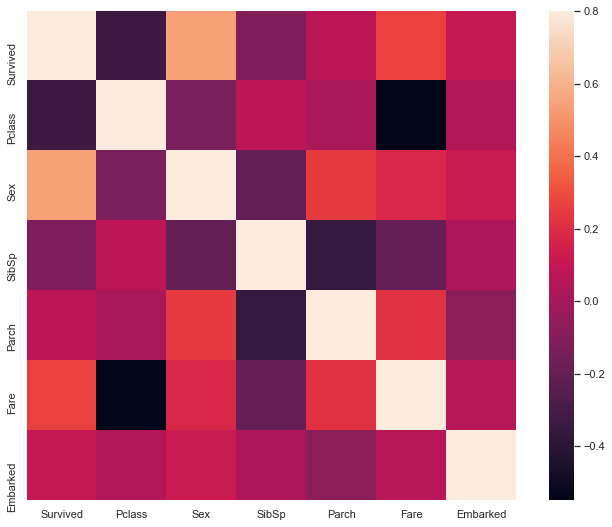

In [16]:
corrmat = imputed_train_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

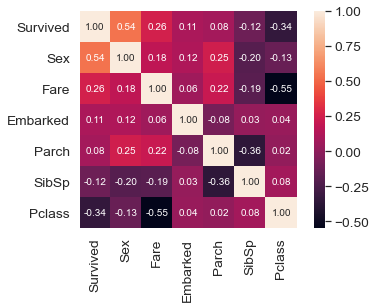

In [17]:
k = 12
cols = corrmat.nlargest(k, 'Survived')['Survived'].index
cm = np.corrcoef(imputed_train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [18]:
imputed_train_data.describe()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,0.682379,0.381594,32.204208,0.362514
std,0.486592,0.836071,0.477990,0.465813,0.806057,49.693429,0.635476
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,0.000000,1.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,1.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,1.000000,6.000000,512.329200,2.000000


In [19]:
imputed_train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [20]:
df_train = imputed_train_data

In [21]:
df_train

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,0.0,3.0,0.0,0.0,0.0,7.2500,0.0
1,1.0,1.0,1.0,0.0,0.0,71.2833,1.0
2,1.0,3.0,1.0,1.0,0.0,7.9250,0.0
3,1.0,1.0,1.0,0.0,0.0,53.1000,0.0
4,0.0,3.0,0.0,1.0,0.0,8.0500,0.0
...,...,...,...,...,...,...,...
886,0.0,2.0,0.0,1.0,0.0,13.0000,0.0
887,1.0,1.0,1.0,1.0,0.0,30.0000,0.0
888,0.0,3.0,1.0,0.0,2.0,23.4500,0.0
889,1.0,1.0,0.0,1.0,0.0,30.0000,1.0


### Import and preprocessing of test dataset

In [22]:
raw_test_data = pd.read_csv('test.csv')

In [23]:
raw_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [24]:
raw_test_data.columns.values

array(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [25]:
test_data = raw_test_data.drop(['Name', 'Ticket', 'Cabin', 'PassengerId', 'Age'], axis = 1)

In [26]:
test_data

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,male,0,0,7.8292,Q
1,3,female,1,0,7.0000,S
2,2,male,0,0,9.6875,Q
3,3,male,0,0,8.6625,S
4,3,female,1,1,12.2875,S
...,...,...,...,...,...,...
413,3,male,0,0,8.0500,S
414,1,female,0,0,108.9000,C
415,3,male,0,0,7.2500,S
416,3,male,0,0,8.0500,S


In [27]:
test_data['Sex'] = test_data['Sex'].map({'female':1, 'male':0})
test_data['Embarked'] = test_data['Embarked'].map({'S':0, 'C':1, 'Q':2})
test_data['SibSp'] = pd.get_dummies(test_data['SibSp'])

In [28]:
test_data

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3,0,1,0,7.8292,2
1,3,1,0,0,7.0000,0
2,2,0,1,0,9.6875,2
3,3,0,1,0,8.6625,0
4,3,1,0,1,12.2875,0
...,...,...,...,...,...,...
413,3,0,1,0,8.0500,0
414,1,1,1,0,108.9000,1
415,3,0,1,0,7.2500,0
416,3,0,1,0,8.0500,0


In [29]:
test_data.isnull().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [30]:
test_data.columns.values

array(['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked'],
      dtype=object)

#### Imputing missing values

In [31]:
from sklearn.impute import KNNImputer

In [32]:
imputer = KNNImputer(n_neighbors=2) 
imputed_test_data = imputer.fit_transform(test_data)

In [33]:
imputed_test_data = pd.DataFrame(imputed_test_data)

In [34]:
imputed_test_data

,0,1,2,3,4,5
0,3.0,0.0,1.0,0.0,7.8292,2.0
1,3.0,1.0,0.0,0.0,7.0000,0.0
2,2.0,0.0,1.0,0.0,9.6875,2.0
3,3.0,0.0,1.0,0.0,8.6625,0.0
4,3.0,1.0,0.0,1.0,12.2875,0.0
...,...,...,...,...,...,...
413,3.0,0.0,1.0,0.0,8.0500,0.0
414,1.0,1.0,1.0,0.0,108.9000,1.0
415,3.0,0.0,1.0,0.0,7.2500,0.0
416,3.0,0.0,1.0,0.0,8.0500,0.0


In [35]:
imputed_test_data.columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [36]:
imputed_test_data

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3.0,0.0,1.0,0.0,7.8292,2.0
1,3.0,1.0,0.0,0.0,7.0000,0.0
2,2.0,0.0,1.0,0.0,9.6875,2.0
3,3.0,0.0,1.0,0.0,8.6625,0.0
4,3.0,1.0,0.0,1.0,12.2875,0.0
...,...,...,...,...,...,...
413,3.0,0.0,1.0,0.0,8.0500,0.0
414,1.0,1.0,1.0,0.0,108.9000,1.0
415,3.0,0.0,1.0,0.0,7.2500,0.0
416,3.0,0.0,1.0,0.0,8.0500,0.0


In [37]:
imputed_test_data.isnull().sum()

Pclass      0
Sex         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

### Splitting of the dataset

In [38]:
X_train = df_train.copy()

In [39]:
X_train = df_train.drop(['Survived'], axis = 1)

In [40]:
Y_train = data['Survived']

In [41]:
X_train

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3.0,0.0,0.0,0.0,7.2500,0.0
1,1.0,1.0,0.0,0.0,71.2833,1.0
2,3.0,1.0,1.0,0.0,7.9250,0.0
3,1.0,1.0,0.0,0.0,53.1000,0.0
4,3.0,0.0,1.0,0.0,8.0500,0.0
...,...,...,...,...,...,...
886,2.0,0.0,1.0,0.0,13.0000,0.0
887,1.0,1.0,1.0,0.0,30.0000,0.0
888,3.0,1.0,0.0,2.0,23.4500,0.0
889,1.0,0.0,1.0,0.0,30.0000,1.0


In [42]:
Y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [43]:
X_test = imputed_test_data.copy()

In [44]:
X_test

,Pclass,Sex,SibSp,Parch,Fare,Embarked
0,3.0,0.0,1.0,0.0,7.8292,2.0
1,3.0,1.0,0.0,0.0,7.0000,0.0
2,2.0,0.0,1.0,0.0,9.6875,2.0
3,3.0,0.0,1.0,0.0,8.6625,0.0
4,3.0,1.0,0.0,1.0,12.2875,0.0
...,...,...,...,...,...,...
413,3.0,0.0,1.0,0.0,8.0500,0.0
414,1.0,1.0,1.0,0.0,108.9000,1.0
415,3.0,0.0,1.0,0.0,7.2500,0.0
416,3.0,0.0,1.0,0.0,8.0500,0.0


### Splitting the train dataset

In [45]:
X_train_mod, X_test_mod, Y_train_mod, Y_test_mod = train_test_split(X_train, Y_train, test_size=0.20, random_state=42)

### Logistic Regression

In [46]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

scaler.fit(X_train_mod)
scaler.fit(X_test_mod)
X_train_mod = scaler.transform(X_train_mod)
X_test_mod = scaler.transform(X_test_mod)

In [47]:
reg = LogisticRegression(solver = 'liblinear', random_state = 42, max_iter = 200, C=0.5, fit_intercept = True)
reg.fit(X_train_mod, Y_train_mod)
Y_pred = reg.predict(X_test_mod)

In [48]:
reg.fit(X_train_mod, Y_train_mod).get_params()

{'C': 0.5,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 200,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [49]:
reg.fit(X_train_mod, Y_train_mod).coef_

array([[-1.56208613,  2.39344241, -0.01382006, -0.42819179,  0.38060005,
         0.47110906]])

In [50]:
reg.classes_

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

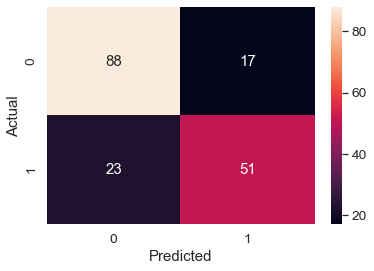

In [51]:
confusion_matrix = pd.crosstab(Y_test_mod, Y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [52]:
print('Accuracy: ', metrics.accuracy_score(Y_test_mod, Y_pred))
plt.show()

Accuracy:  0.776536312849162


In [53]:
print(classification_report(Y_test_mod, Y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       105
           1       0.75      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.77      0.76      0.77       179
weighted avg       0.78      0.78      0.77       179



In [54]:
Predicted = reg.predict(X_test)

### Output to csv

In [55]:
output = pd.DataFrame({'PassengerId': raw_test_data.PassengerId, 'Survived': Predicted})
output.to_csv('my_submissionAl.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
